In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import fftpack
from scipy import signal

In [2]:
file_name="center_sternum.txt"
data=pd.read_csv(file_name, "\t")

C:\Users\enric\AppData\Local\Temp\ipykernel_1068\1734790252.py:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data=pd.read_csv(file_name, "\t")


In [3]:
freqs = data["Log Freq"].unique()
freq = np.bincount(freqs).argmax()
dt = 1.0/freq
#data["Abs Time"] = np.arange(0, len(data)*dt, dt)
initial_time=data.loc[0, "Timestamp"]
data["Abs Time"] = np.zeros(len(data))
for value, table in data.groupby("Timestamp"):
    data.loc[data["Timestamp"] == value, "Abs Time"] = value - initial_time + np.arange(0, len(table),1)/len(table)
labels=["GyroX", "GyroY", "GyroZ", "AccX", "AccY", "AccZ", "MagnX", "MagnY", "MagnZ"]
Nvar = len(labels)
data=data.drop(["Log Mode", "qw", "qi", "qj", "qk"], axis=1)
data

,Log Freq,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ,Abs Time
0,200,1576222772,947.086,435.662,70.638,-6.824428,-14.244280,1.404580,-454,-490,-178,0.000000
1,200,1576222772,969.168,387.777,88.877,6.183206,-12.290080,-7.969466,-454,-490,-177,0.004464
2,200,1576222772,989.603,380.335,78.751,11.709920,-4.961832,-7.450382,-454,-490,-177,0.008929
3,200,1576222772,954.894,418.033,88.328,17.877860,2.519084,-5.984733,-454,-492,-176,0.013393
4,200,1576222772,972.096,427.732,99.857,25.221370,5.404580,4.015267,-454,-492,-176,0.017857
...,...,...,...,...,...,...,...,...,...,...,...,...
16501,200,1576222847,958.493,291.092,-54.290,1.664122,2.305344,-0.671756,-494,-449,-126,75.972527
16502,200,1576222847,954.650,288.042,-49.654,1.480916,2.488550,-0.702290,-494,-450,-125,75.978022
16503,200,1576222847,967.338,290.482,-63.867,1.114504,3.374046,-0.900763,-494,-450,-125,75.983516
16504,200,1576222847,965.630,300.852,-56.242,0.702290,3.664122,-1.587786,-495,-448,-124,75.989011


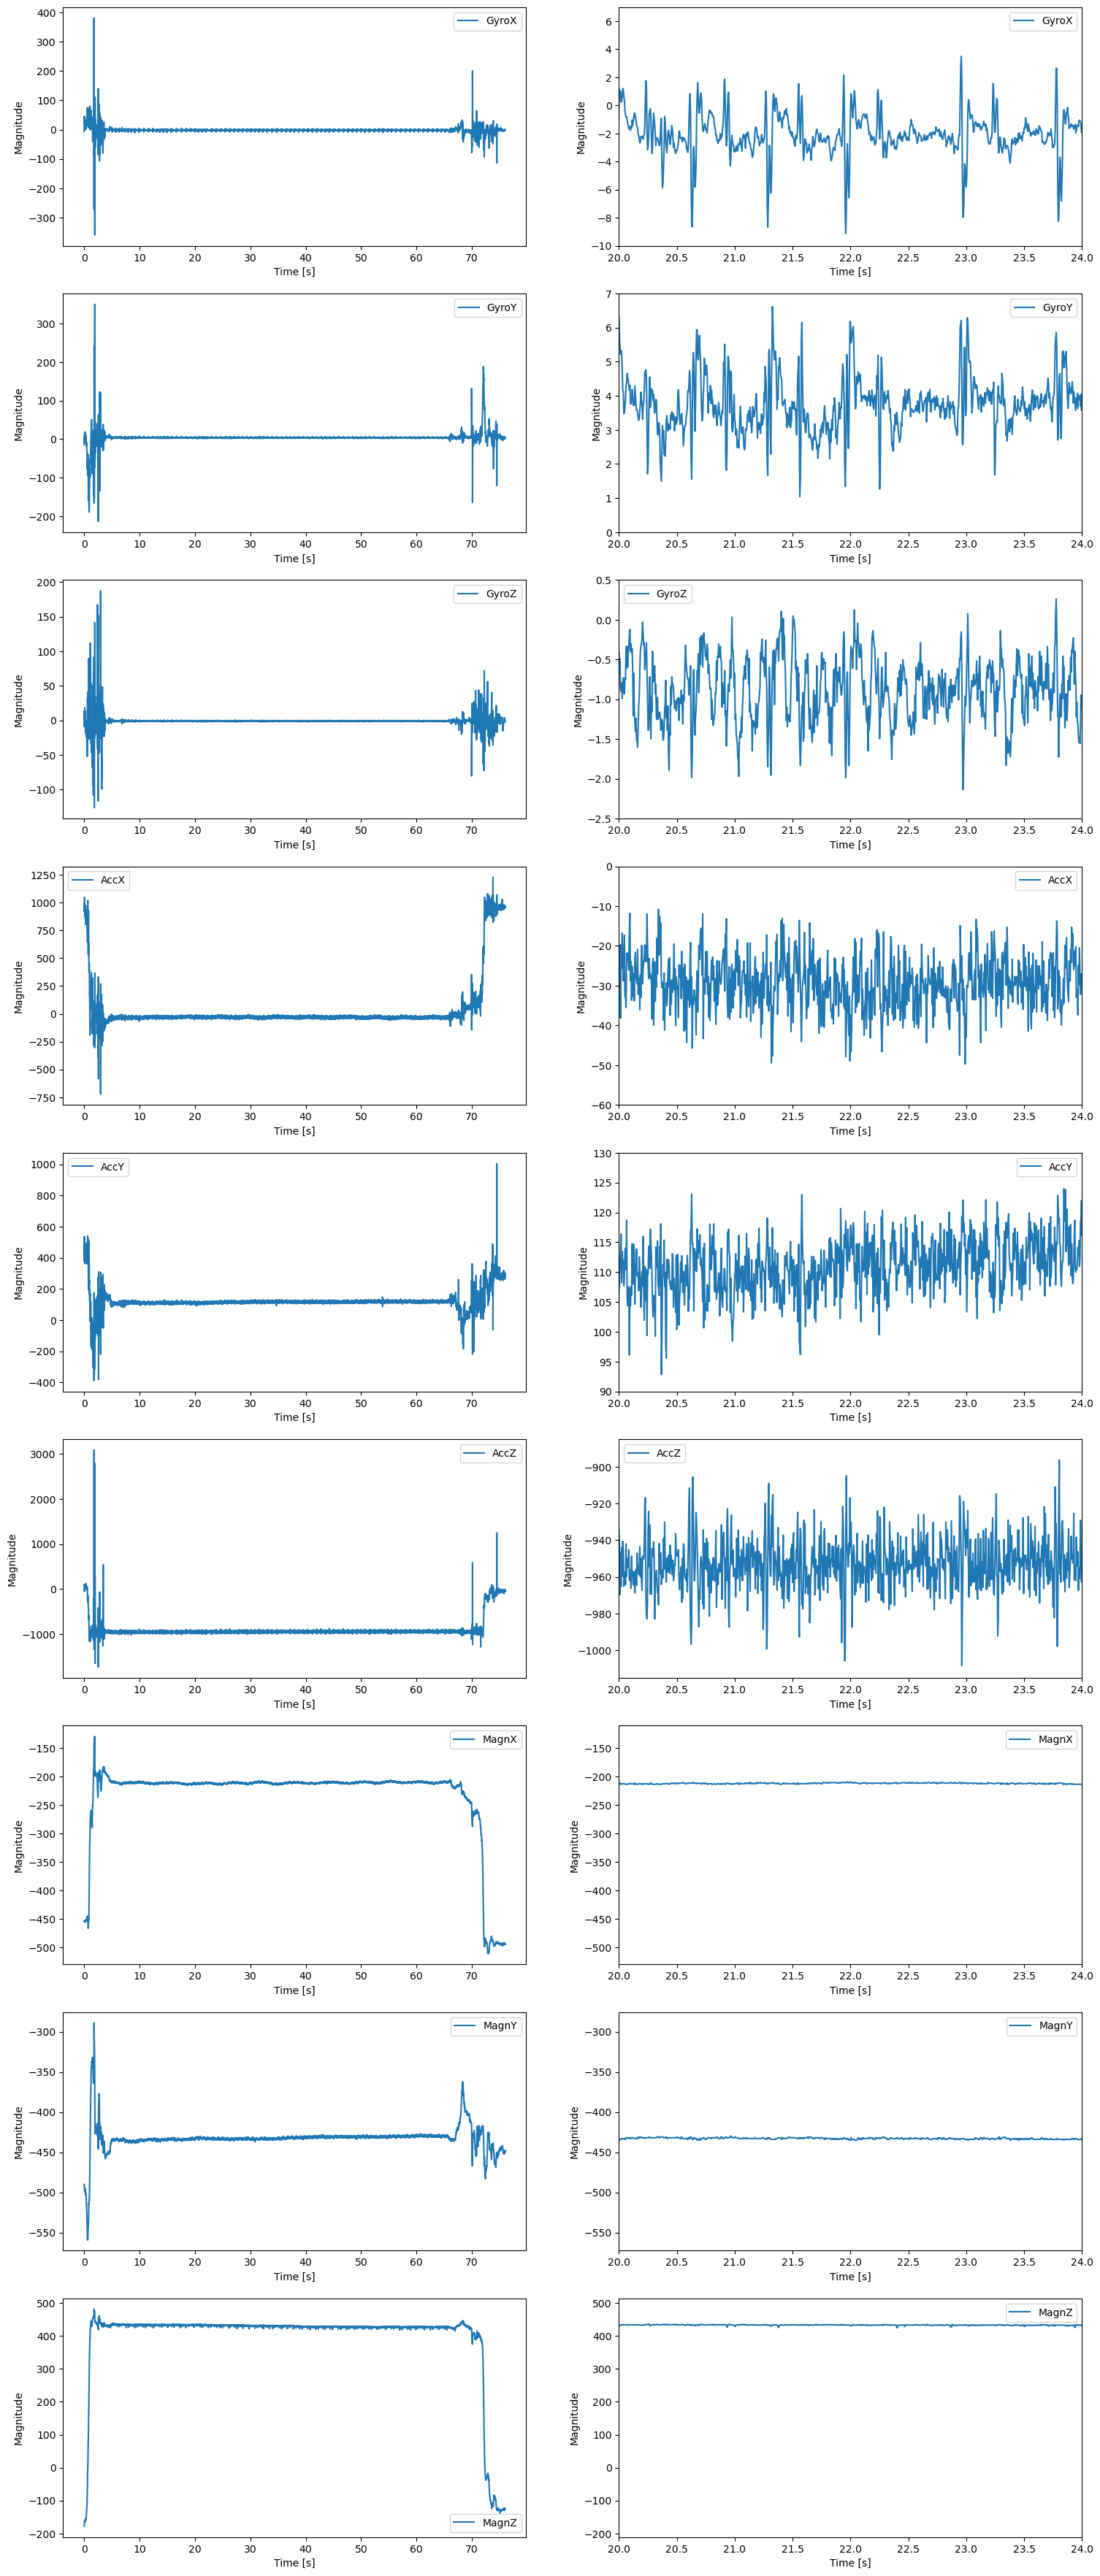

In [4]:
#plot Gyro and Acc
fig, axs = plt.subplots(nrows=Nvar, ncols=2, figsize=(18,45))

for i in range(2):
    for j in range(Nvar):
        axs[j][i].plot(data["Abs Time"], data[labels[j]], label=labels[j])
        if i == 1:
            axs[j][i].set_xlim([20,24])
        
axs[0][1].set_ylim([-10,7])
axs[1][1].set_ylim([0,7])
axs[2][1].set_ylim([-2.5,0.5])
axs[3][1].set_ylim([-60,-0])
axs[4][1].set_ylim([90,130])
axs[5][1].set_ylim([-1015,-885])


for ax in axs.flatten():
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Magnitude")
    ax.legend(loc="best")

In [5]:
#select only regular time window [10;65]s
t1_cut = 10
t2_cut = 65
data = data.drop(data.index[range(t2_cut*freq,len(data))])
data = data.drop(data.index[range(t1_cut*freq)])
data

,Log Freq,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ,Abs Time
2000,200,1576222781,-32.635,112.911,-953.796,1.755725,5.022901,-0.809160,-212,-439,432,9.178571
2001,200,1576222781,-19.154,112.362,-971.608,1.557252,4.198473,-1.083969,-212,-439,432,9.183036
2002,200,1576222781,-27.450,110.593,-944.280,0.931298,4.320611,-1.099237,-211,-436,428,9.187500
2003,200,1576222781,-21.777,113.948,-940.803,0.946565,4.137404,-1.267176,-211,-436,428,9.191964
2004,200,1576222781,-32.391,118.218,-924.394,1.022901,4.702290,-0.992366,-212,-438,433,9.196429
...,...,...,...,...,...,...,...,...,...,...,...,...
12995,200,1576222831,-31.842,118.279,-941.901,-1.679389,3.664122,-0.503817,-210,-430,426,59.700893
12996,200,1576222831,-40.626,116.998,-949.404,-1.129771,4.015267,-0.519084,-210,-430,426,59.705357
12997,200,1576222831,-33.062,116.693,-949.404,-1.114504,3.587786,-0.717557,-210,-429,428,59.709821
12998,200,1576222831,-25.254,118.523,-961.787,-1.557252,3.938931,-0.641221,-210,-429,428,59.714286


In [6]:
#get statistical descriptors 
data_stat = data.describe()
data_stat

,Log Freq,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ,Abs Time
count,11000.0,1.100000e+04,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,200.0,1.576223e+09,-30.560845,115.322613,-949.554925,-2.077170,3.688219,-0.868322,-211.681273,-432.441636,429.996455,34.458612
std,0.0,1.459514e+01,7.019645,5.339442,14.394306,1.425450,0.717922,0.364963,1.325838,1.728781,2.893303,14.591928
min,200.0,1.576223e+09,-66.917000,85.827000,-1015.528000,-10.000000,0.503817,-2.503817,-216.000000,-439.000000,418.000000,9.178571
25%,200.0,1.576223e+09,-35.197000,111.752000,-958.066000,-2.687023,3.282443,-1.114504,-213.000000,-434.000000,428.000000,21.829241
50%,200.0,1.576223e+09,-30.439000,115.473000,-950.014000,-2.152672,3.633588,-0.854962,-212.000000,-432.000000,430.000000,34.445238
75%,200.0,1.576223e+09,-25.864000,118.828000,-941.840000,-1.465649,4.000000,-0.625954,-211.000000,-431.000000,433.000000,47.072619
max,200.0,1.576223e+09,-5.429000,147.376000,-879.742000,4.473282,7.557252,0.641221,-207.000000,-428.000000,436.000000,59.718750


In [7]:
#set mean to zero
for l in labels:
    data[l]= data[l]-data_stat.at["mean",l]

In [8]:
data.describe()

,Log Freq,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ,Abs Time
count,11000.0,1.100000e+04,1.100000e+04,1.100000e+04,1.100000e+04,1.100000e+04,1.100000e+04,1.100000e+04,1.100000e+04,1.100000e+04,1.100000e+04,11000.000000
mean,200.0,1.576223e+09,3.183038e-14,-1.756022e-13,-6.384446e-13,3.307597e-15,-5.186033e-15,9.765925e-17,-2.388199e-14,9.071176e-14,-3.298985e-13,34.458612
std,0.0,1.459514e+01,7.019645e+00,5.339442e+00,1.439431e+01,1.425450e+00,7.179224e-01,3.649630e-01,1.325838e+00,1.728781e+00,2.893303e+00,14.591928
min,200.0,1.576223e+09,-3.635616e+01,-2.949561e+01,-6.597307e+01,-7.922830e+00,-3.184403e+00,-1.635495e+00,-4.318727e+00,-6.558364e+00,-1.199645e+01,9.178571
25%,200.0,1.576223e+09,-4.636155e+00,-3.570613e+00,-8.511075e+00,-6.098530e-01,-4.057763e-01,-2.461820e-01,-1.318727e+00,-1.558364e+00,-1.996455e+00,21.829241
50%,200.0,1.576223e+09,1.218447e-01,1.503872e-01,-4.590749e-01,-7.550197e-02,-5.463133e-02,1.336021e-02,-3.187273e-01,4.416364e-01,3.545455e-03,34.445238
75%,200.0,1.576223e+09,4.696845e+00,3.505387e+00,7.714925e+00,6.115210e-01,3.117807e-01,2.423678e-01,6.812727e-01,1.441636e+00,3.003545e+00,47.072619
max,200.0,1.576223e+09,2.513184e+01,3.205339e+01,6.981293e+01,6.550452e+00,3.869033e+00,1.509543e+00,4.681273e+00,4.441636e+00,6.003545e+00,59.718750


In [16]:
#perform Fourier analysis

sig_fft = 1j*np.zeros((Nvar, len(data)))

for i in range(Nvar):
    sig_fft[i] = fftpack.fft(data[labels[i]].values)

power = np.abs(sig_fft)
sample_freq = fftpack.fftfreq(len(data), d=0.00446)

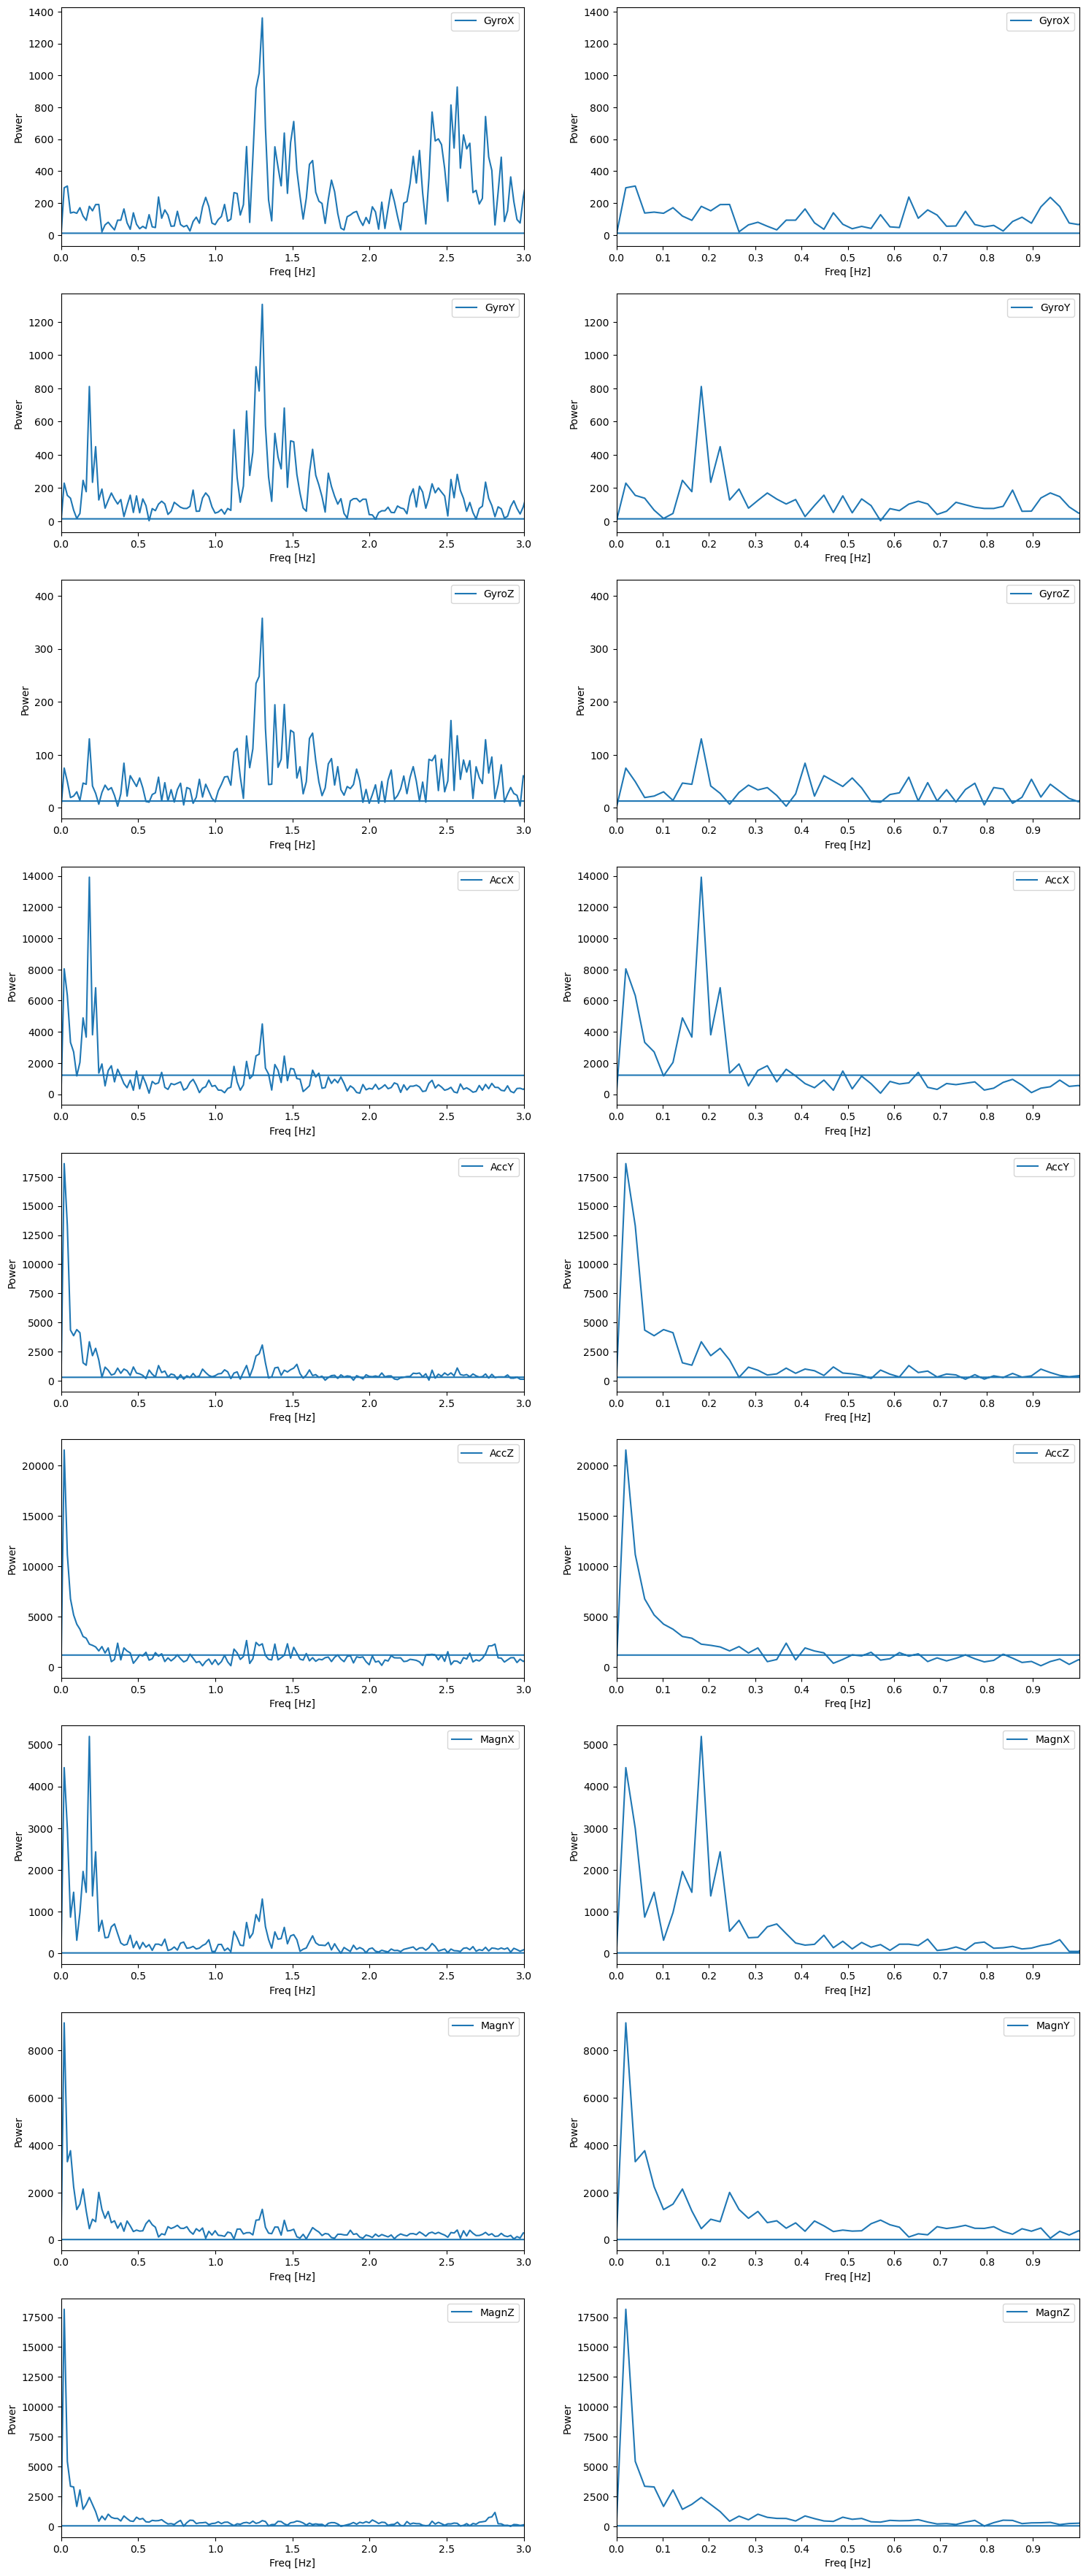

In [17]:
fig, axs = plt.subplots(nrows=Nvar, ncols=2, figsize=(18,45))

for i in range(2):
    for j in range(Nvar):
        axs[j][i].plot(sample_freq, power[j], label=labels[j])
        if i == 0:
            axs[j][0].set_xlim([0,3])
        else:
            axs[j][i].set_xlim([0,1])
            axs[j][i].set_xticks(np.arange(0,1,0.1))
        

for ax in axs.flatten():
    ax.set_xlabel("Freq [Hz]")
    ax.set_ylabel("Power")
    ax.legend(loc="best")

In [18]:
#filter signal with Butterworth bandpass filter in [0.1,0.9] Hz range

filtered = np.zeros((Nvar,len(data)))
sos = signal.butter(2, [0.1,0.9], 'bandpass', fs=freq, output='sos')
for i in range(Nvar):
    filtered[i] = signal.sosfilt(sos, data[labels[i]])

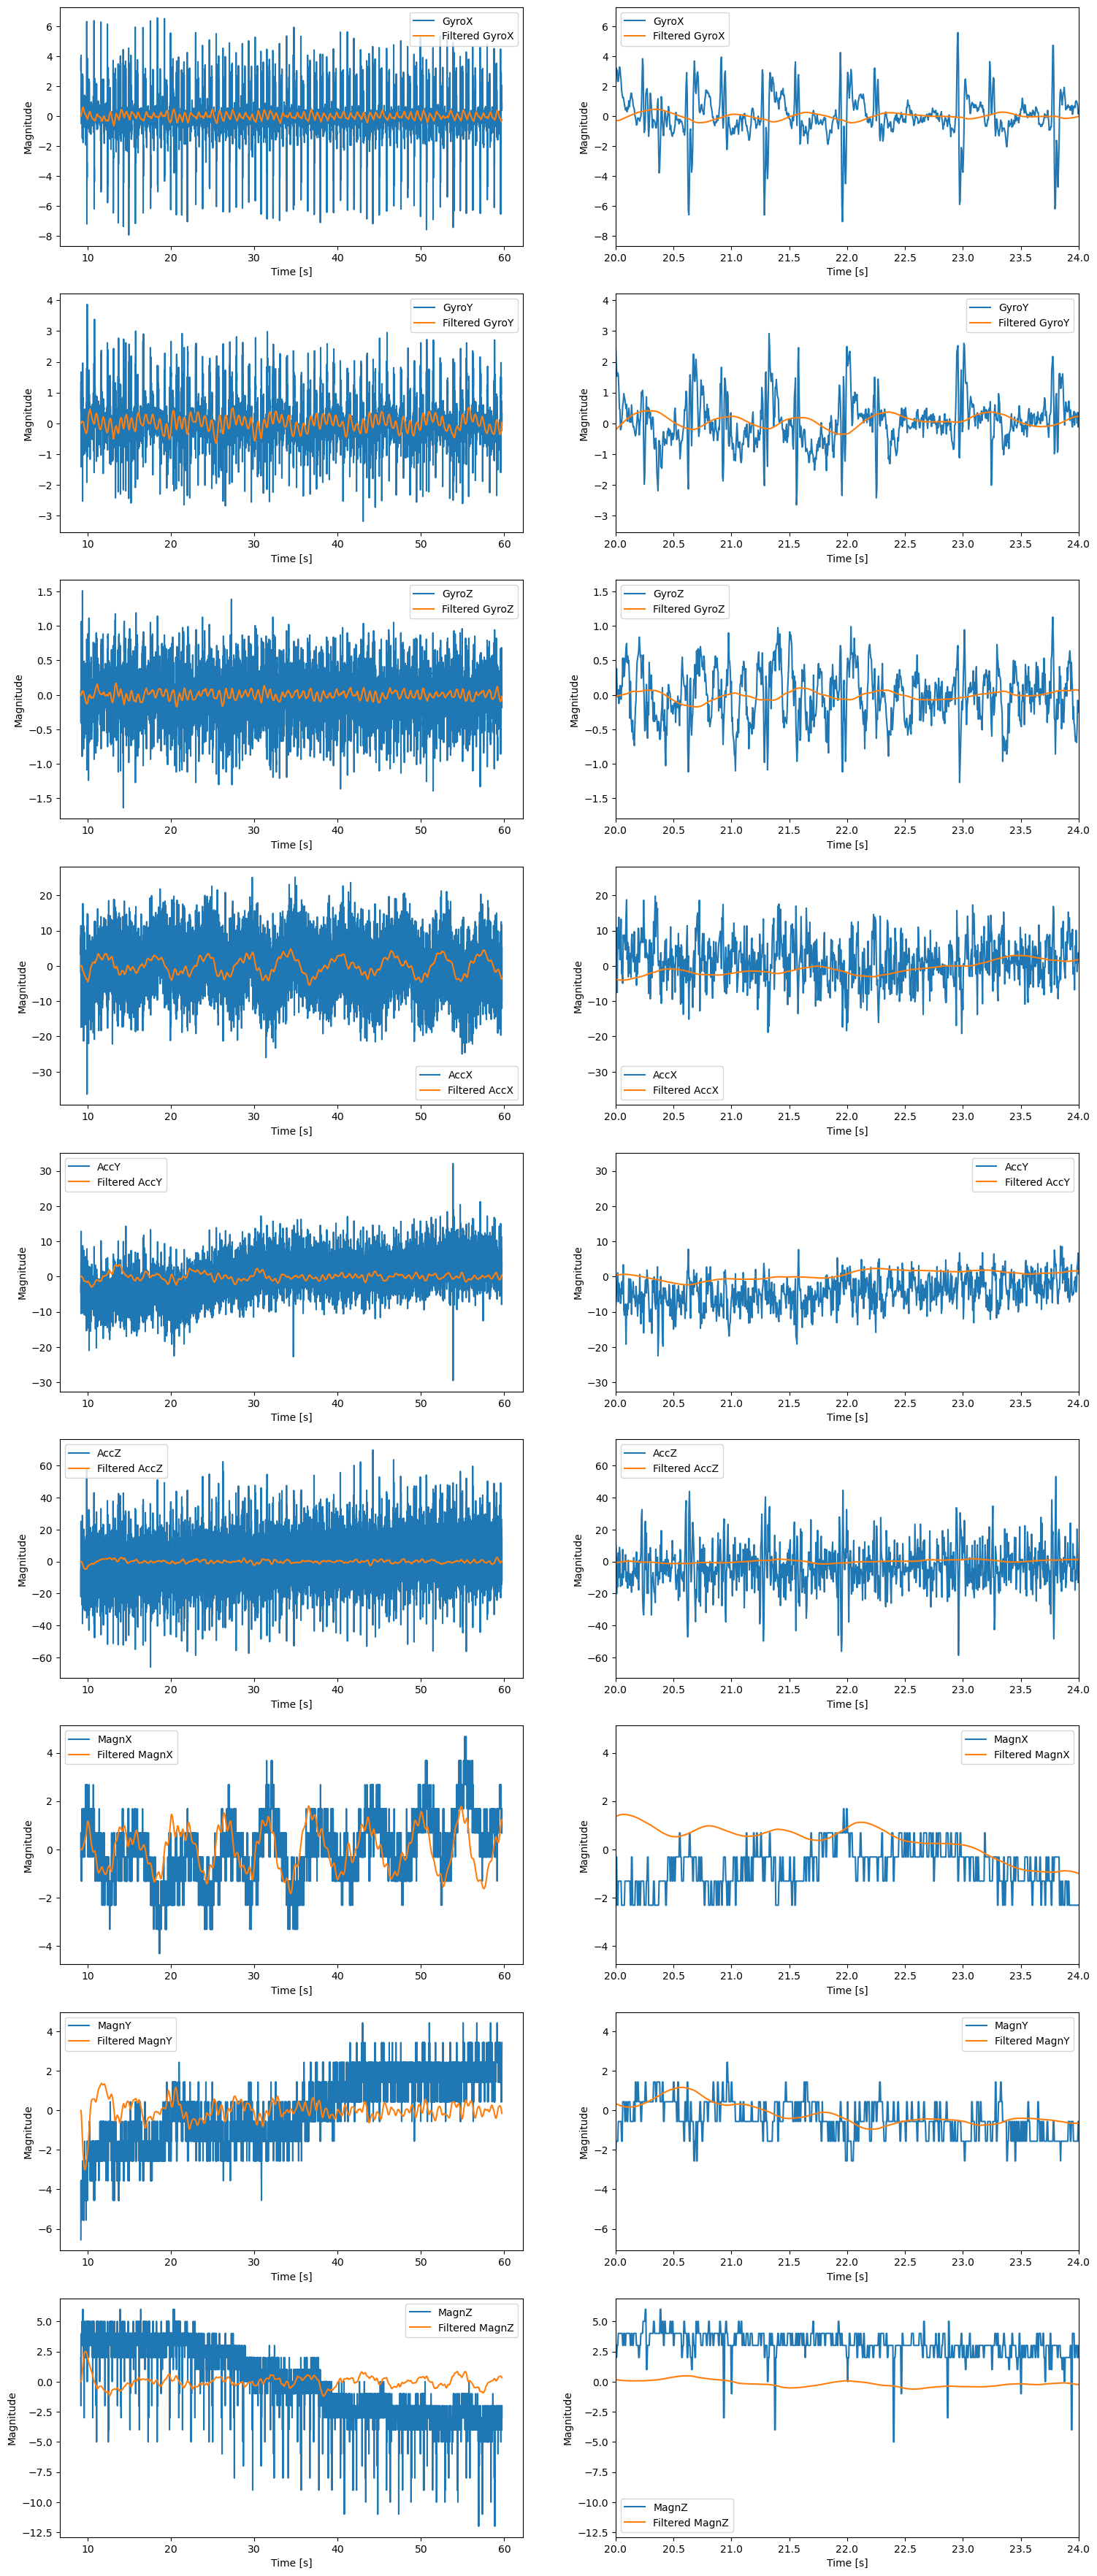

In [19]:
#plot filtered Gyro and Acc
fig, axs = plt.subplots(nrows=Nvar, ncols=2, figsize=(18,45))

for i in range(2):
    for j in range(Nvar):
        axs[j][i].plot(data["Abs Time"], data[labels[j]], label=labels[j])
        axs[j][i].plot(data["Abs Time"], filtered[j],     label=("Filtered "+labels[j]))
        if i == 1:
            axs[j][i].set_xlim([20,24])

for ax in axs.flatten():
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Magnitude")
    ax.legend(loc="best")

In [20]:
#plot filtered spectrum
sig_fft_new = 1j*np.zeros((Nvar, len(data)))

for i in range(Nvar):
    sig_fft_new[i] = fftpack.fft(filtered[i])

power_new = np.abs(sig_fft_new)

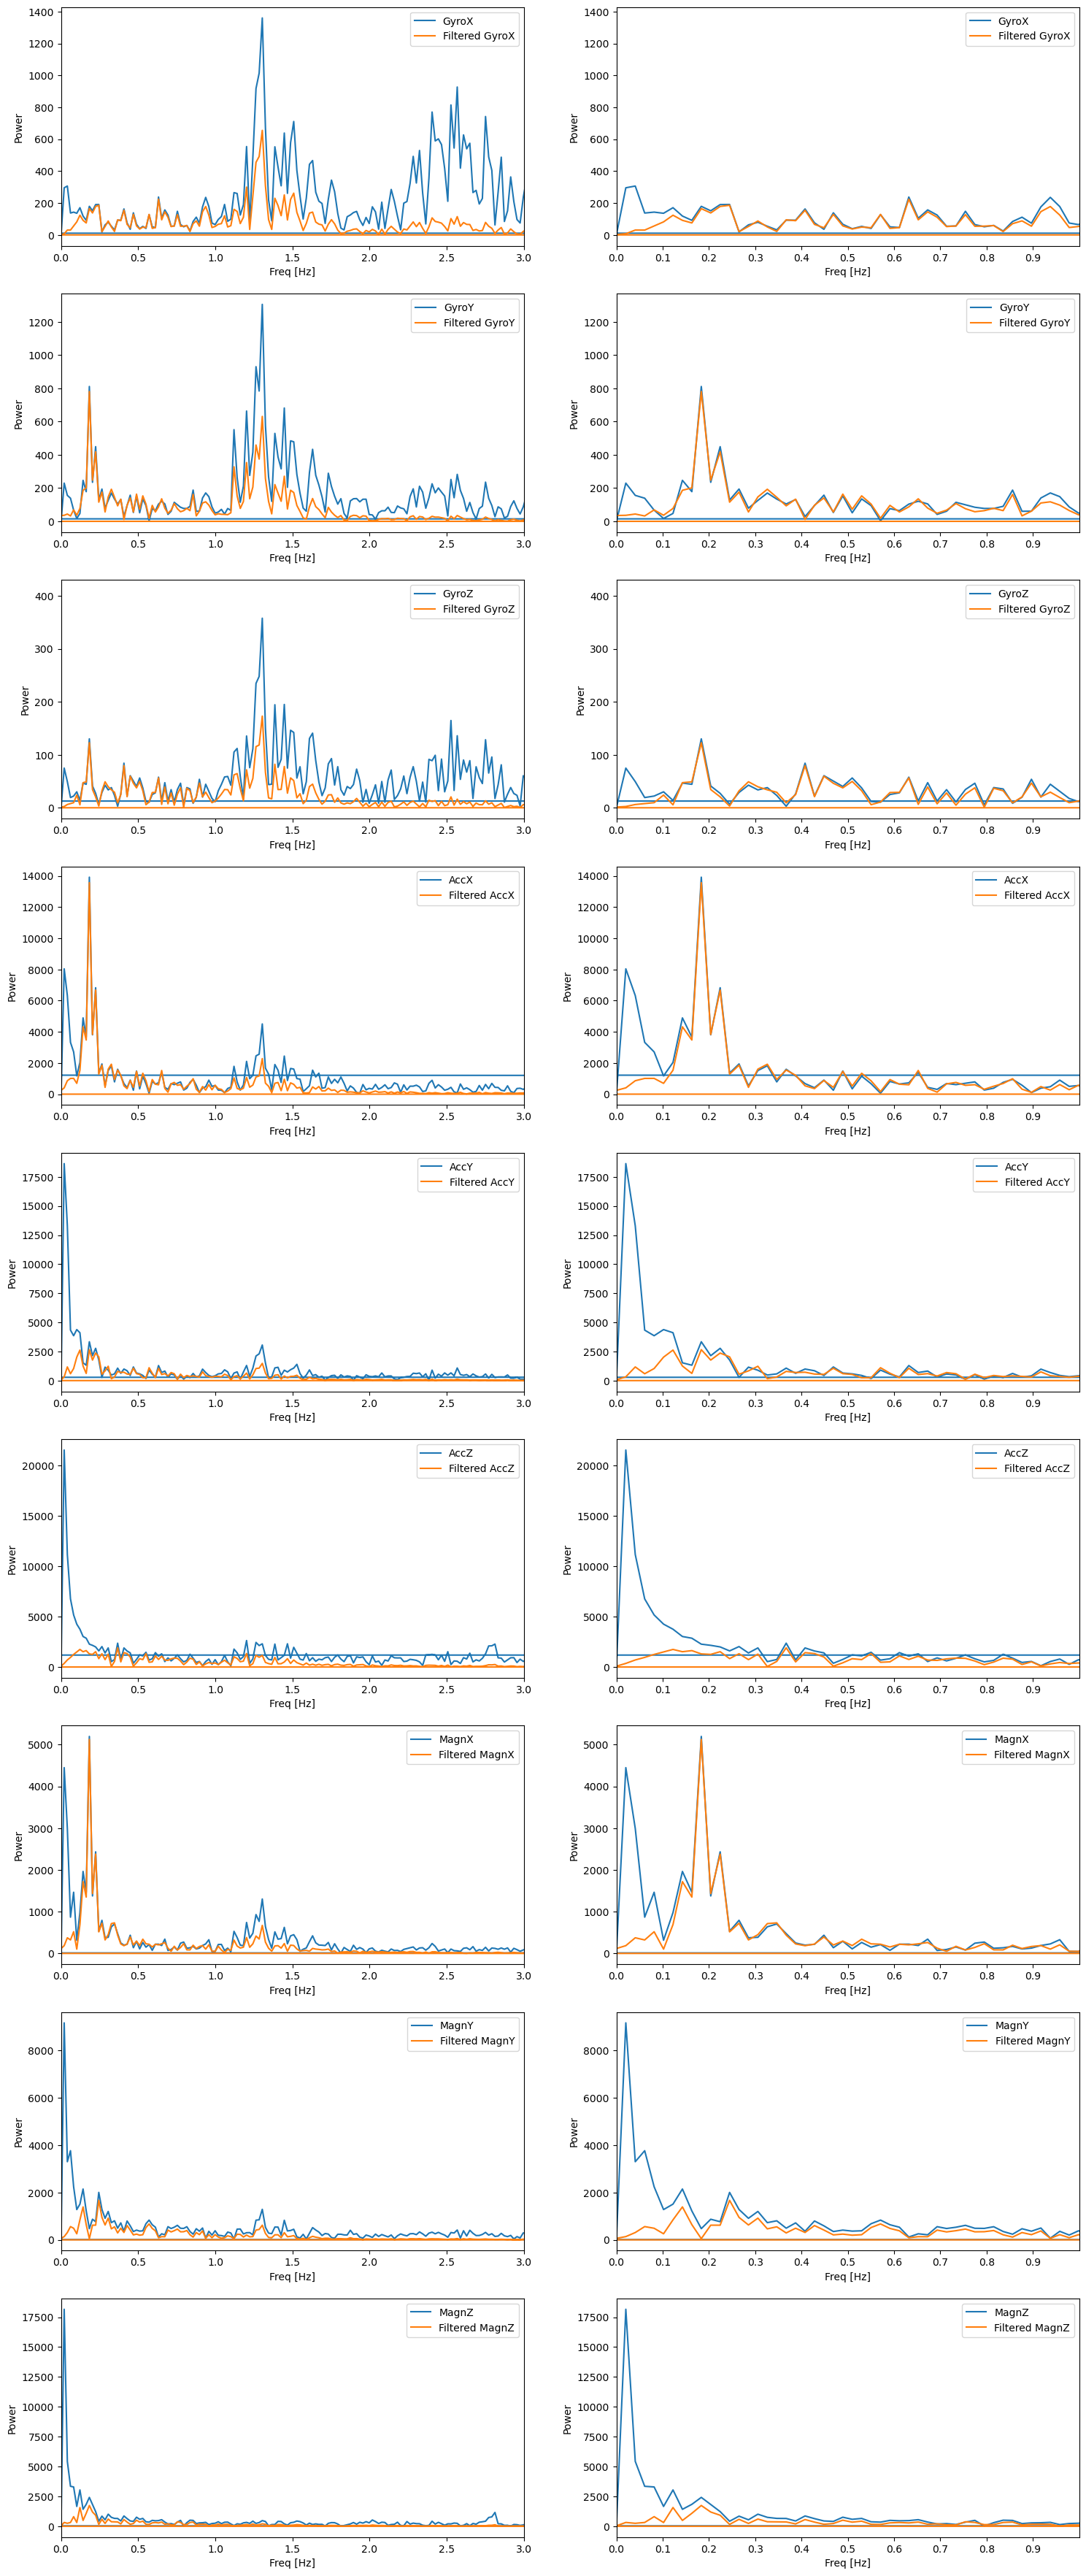

In [21]:
fig, axs = plt.subplots(nrows=Nvar, ncols=2, figsize=(18,45))

for i in range(2):
    for j in range(Nvar):
        axs[j][i].plot(sample_freq, power[j],     label=labels[j])
        axs[j][i].plot(sample_freq, power_new[j], label=("Filtered "+labels[j]))
        if i == 0:
            axs[j][0].set_xlim([0,3])
        else:
            axs[j][i].set_xlim([0,1])
            axs[j][i].set_xticks(np.arange(0,1,0.1))
        

for ax in axs.flatten():
    ax.set_xlabel("Freq [Hz]")
    ax.set_ylabel("Power")
    ax.legend(loc="best")